# Deep learning SOTA approach

This notebook exemplifies the usage of the deepOD library https://deepod.readthedocs.io/en/latest/index.html containing reconstruction-, representation-learning-, and self-superivsed-based latest deep learning methods.

The first section leverages a model for tabular data (DeepSVDD) and compares it with 2 timeseries models having increased performance as they exploit the temporal relation of the dataset (TimesNet and TranAD).

In [1]:
import sys
sys.path.append('../src')
import evaluation_utils, data_utils

import numpy as np
import json

# Load input data

X shape: (1831, 21), y shape: (1831,)


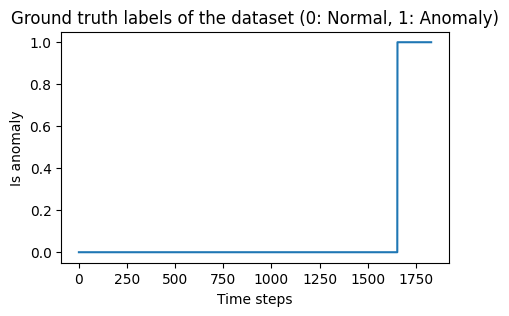

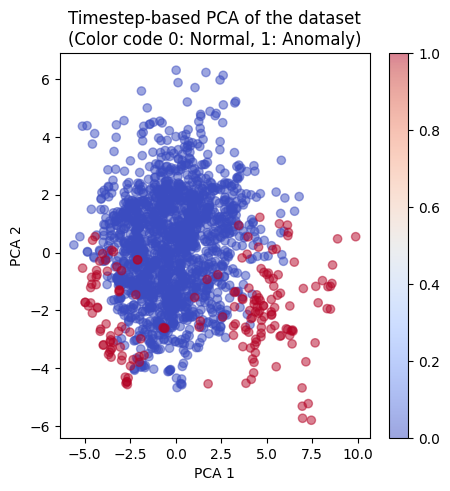

In [2]:
# Data loading
X, y = data_utils.get_data('../data/6_cardio.npz')
data_utils.plot_dataset(X, y)

# Model for tabular data

In [3]:
from deepod.models.tabular import DeepSVDD
clf = DeepSVDD(device = None)
clf.fit(X, y=None)
y_pred = clf.decision_function(X)

Start Training...
ensemble size: 1
MLPnet(
  (network): Sequential(
    (0): LinearBlock(
      (linear): Linear(in_features=21, out_features=100, bias=False)
      (act_layer): ReLU()
    )
    (1): LinearBlock(
      (linear): Linear(in_features=100, out_features=50, bias=False)
      (act_layer): ReLU()
    )
    (2): LinearBlock(
      (linear): Linear(in_features=50, out_features=128, bias=False)
      (act_layer): Identity()
    )
  )
)
epoch  1, training loss: 0.508020, time: 0.1s
epoch 10, training loss: 0.024299, time: 0.0s
epoch 20, training loss: 0.011135, time: 0.0s
epoch 30, training loss: 0.006726, time: 0.0s
epoch 40, training loss: 0.005063, time: 0.0s
epoch 50, training loss: 0.003334, time: 0.0s
epoch 60, training loss: 0.002521, time: 0.0s
epoch 70, training loss: 0.002205, time: 0.0s
epoch 80, training loss: 0.001739, time: 0.1s
epoch 90, training loss: 0.001397, time: 0.1s
epoch100, training loss: 0.001231, time: 0.1s
Start Inference on the training data...


testing: 100%|██████████| 29/29 [00:00<00:00, 1381.81it/s]


In [4]:
# reshape predictions
predicted_anomalies = np.array(y_pred).reshape(-1)

In [5]:
# Evaluation
scores = evaluation_utils.run_evaluation(y, predicted_anomalies, do_point_adjustment=True)
# pretty print results
print(json.dumps(scores, indent=4))
data_utils.save_results(f"results/deepod DeepSVDD.npz", scores)

{
    "AUCROC": 0.5445344685525955,
    "AUCPR": 0.1188124434534083,
    "F1": 0.18515023677498718,
    "Precision": 0.10939112487100103,
    "Recall": 0.6022727272727273,
    "Adjusted AUCROC": 0.9921450151057402,
    "Adjusted AUCPR": 0.9312169312169312,
    "Adjusted F1": 0.9643785680123464,
    "Adjusted Precision": 0.9312169312169312,
    "Adjusted Recall": 1.0
}
Results saved to results/deepod DeepSVDD.npz


# Model for timeseries data

In [6]:
from deepod.models.time_series import TimesNet
clf = TimesNet(device=None)
clf.fit(X)
y_pred = clf.decision_function(X)

epoch  1, training loss: 0.989508, time: 70.4s
epoch  2, training loss: 0.901019, time: 85.1s
epoch  3, training loss: 0.691227, time: 114.0s
epoch  4, training loss: 0.680557, time: 117.6s
epoch  5, training loss: 0.560068, time: 125.3s
epoch  6, training loss: 0.563404, time: 108.1s
epoch  7, training loss: 0.487279, time: 114.1s
epoch  8, training loss: 0.461194, time: 147.9s
epoch  9, training loss: 0.463147, time: 190.9s
epoch 10, training loss: 0.473248, time: 183.2s


In [7]:
# reshape predictions
predicted_anomalies = np.array(y_pred).reshape(-1)

In [8]:
# Evaluation
scores = evaluation_utils.run_evaluation(y, predicted_anomalies, do_point_adjustment=True)
# pretty print results
print(json.dumps(scores, indent=4))
data_utils.save_results(f"results/deepod TimesNet.npz", scores)

{
    "AUCROC": 0.7765586377368856,
    "AUCPR": 0.3896573686043172,
    "F1": 0.4196135370223078,
    "Precision": 0.4031413612565445,
    "Recall": 0.4375,
    "Adjusted AUCROC": 1.0,
    "Adjusted AUCPR": 1.0,
    "Adjusted F1": 0.9999950000249999,
    "Adjusted Precision": 1.0,
    "Adjusted Recall": 1.0
}
Results saved to results/deepod TimesNet.npz


In [9]:
from deepod.models.time_series import TranAD
clf = TranAD(device=None)
clf.fit(X)
y_pred = clf.decision_function(X)

Epoch 1,	 L1 = 1.0385258793830872
Epoch 2,	 L1 = 1.0296148274626051
Epoch 3,	 L1 = 0.916243280683245
Epoch 4,	 L1 = 0.8829407691955566
Epoch 5,	 L1 = 0.8665252923965454


In [10]:
# reshape predictions
predicted_anomalies = np.array(y_pred).reshape(-1)

In [11]:
# Evaluation
scores = evaluation_utils.run_evaluation(y, predicted_anomalies, do_point_adjustment=True)
# pretty print results
print(json.dumps(scores, indent=4))
data_utils.save_results(f"results/deepod TranAD.npz", scores)

{
    "AUCROC": 0.9525473770942049,
    "AUCPR": 0.6586196052325077,
    "F1": 0.6788462077274473,
    "Precision": 0.6280193236714976,
    "Recall": 0.7386363636363636,
    "Adjusted AUCROC": 1.0,
    "Adjusted AUCPR": 1.0,
    "Adjusted F1": 0.9999950000249999,
    "Adjusted Precision": 1.0,
    "Adjusted Recall": 1.0
}
Results saved to results/deepod TranAD.npz
